## Credit Card Fraud Detection Predictive Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
credit_data = pd.read_csv('creditcard.csv')
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Набор данных содержит транзакции, совершенные европейскими держателями карт по кредитным картам в сентябре 2013 года. В этом наборе данных представлены транзакции, произошедшие за два дня.

**V1, V2,… V28** - зашифрованные исходные переменные

**Time** содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. 

**Amount** представляет собой сумму транзакции.

**Class** это переменная ответа, которая принимает значение 1 в случае мошенничества и 0 в противном случае.




In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

В наборе данных 284807 строк, отсутствующих значений нет

In [4]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


В таблице видно, что минимальная сумма транзакции = 0. Проверим, сколько нулевых транзакций содержит набор данных

In [5]:
len(credit_data.loc[((credit_data.Amount == 0) & (credit_data.Class == 0))])

1798

In [6]:
len(credit_data.loc[((credit_data.Amount == 0) & (credit_data.Class == 1))])

27

Набор данных содержит 1798 безопасных и 27 мошеннических транзакций, где сумма = 0. Транзакция не может быть нулевой, поэтому удалим эти строки

In [7]:
credit_data = credit_data[credit_data.Amount != 0]
len(credit_data)

282982

В наборе данных 0.16 % мошеннических транзакций


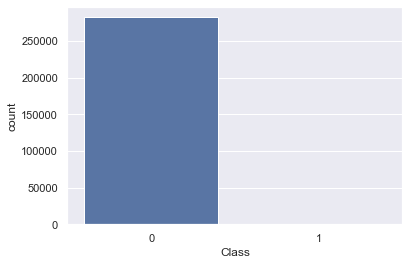

In [8]:
sns.countplot(x = 'Class', data = credit_data)
print('В наборе данных', round((credit_data.Class.sum()/credit_data.Class.count()*100),2),'% мошеннических транзакций')

In [9]:
credit_data.Class.value_counts()

0    282517
1       465
Name: Class, dtype: int64

Классы сильно не сбалансированы, из 282517 операций всего 465 мошеннические

2 атрибута - Time и Amount не зашифрованы, посмотрим на их распределения в зависимости от типа транзакции

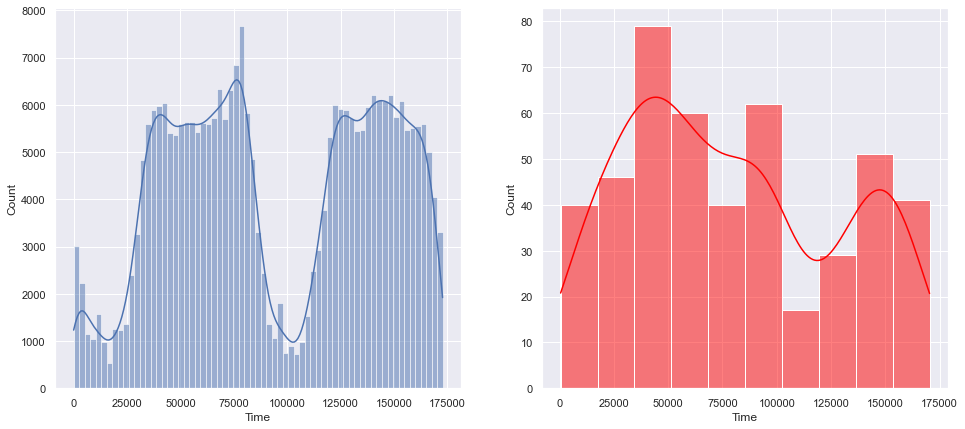

In [10]:
class_0 = credit_data[credit_data.Class == 0]['Time']
class_1 = credit_data[credit_data.Class == 1]['Time']

fig, axes = plt.subplots(1,2, figsize=(16,7))

sns.histplot(class_0, kde = True, ax = axes[0])
sns.histplot(class_1, kde = True, color = 'red', ax = axes[1]);

В сутках 86400 секунд, на графике распределения времени безопасных транзакций видно, что ночью совершается минимум транзакций. Распределение времени мошеннических транзакций имеет другую форму, оно не так сильно зависит от времени суток

Посмотрим на распределение сумм в зависимости от типа транзакции

<AxesSubplot:xlabel='Class', ylabel='Amount'>

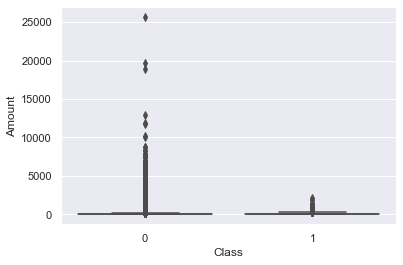

In [11]:
sns.boxplot(data = credit_data, x = 'Class', y = 'Amount', showfliers=True)

Боксплот оказался не очень информативен, так как данные содержат много выбросов. Посмотрим как распределены суммы транзакций, используя описательные статистики

In [12]:
class_0 = credit_data[credit_data.Class == 0]['Amount']
class_1 = credit_data[credit_data.Class == 1]['Amount']

class_0.describe()

count    282517.000000
mean         88.852926
std         250.800179
min           0.010000
25%           5.990000
50%          22.490000
75%          78.000000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
class_1.describe()

count     465.000000
mean      129.307462
std       262.298781
min         0.010000
25%         1.000000
50%        17.060000
75%       111.700000
max      2125.870000
Name: Amount, dtype: float64

Интерквартильный размах и медианы разные для мошеннических и безопасных транзакций. Медиана сумм безопасных транзакций - 22.49 доллара, тогда как медиана мошеннических транзакций - 17.06 доллара

Посмотрим распределения всех признаков с учетом типа транзакции

/Users/iriska/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/iriska/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

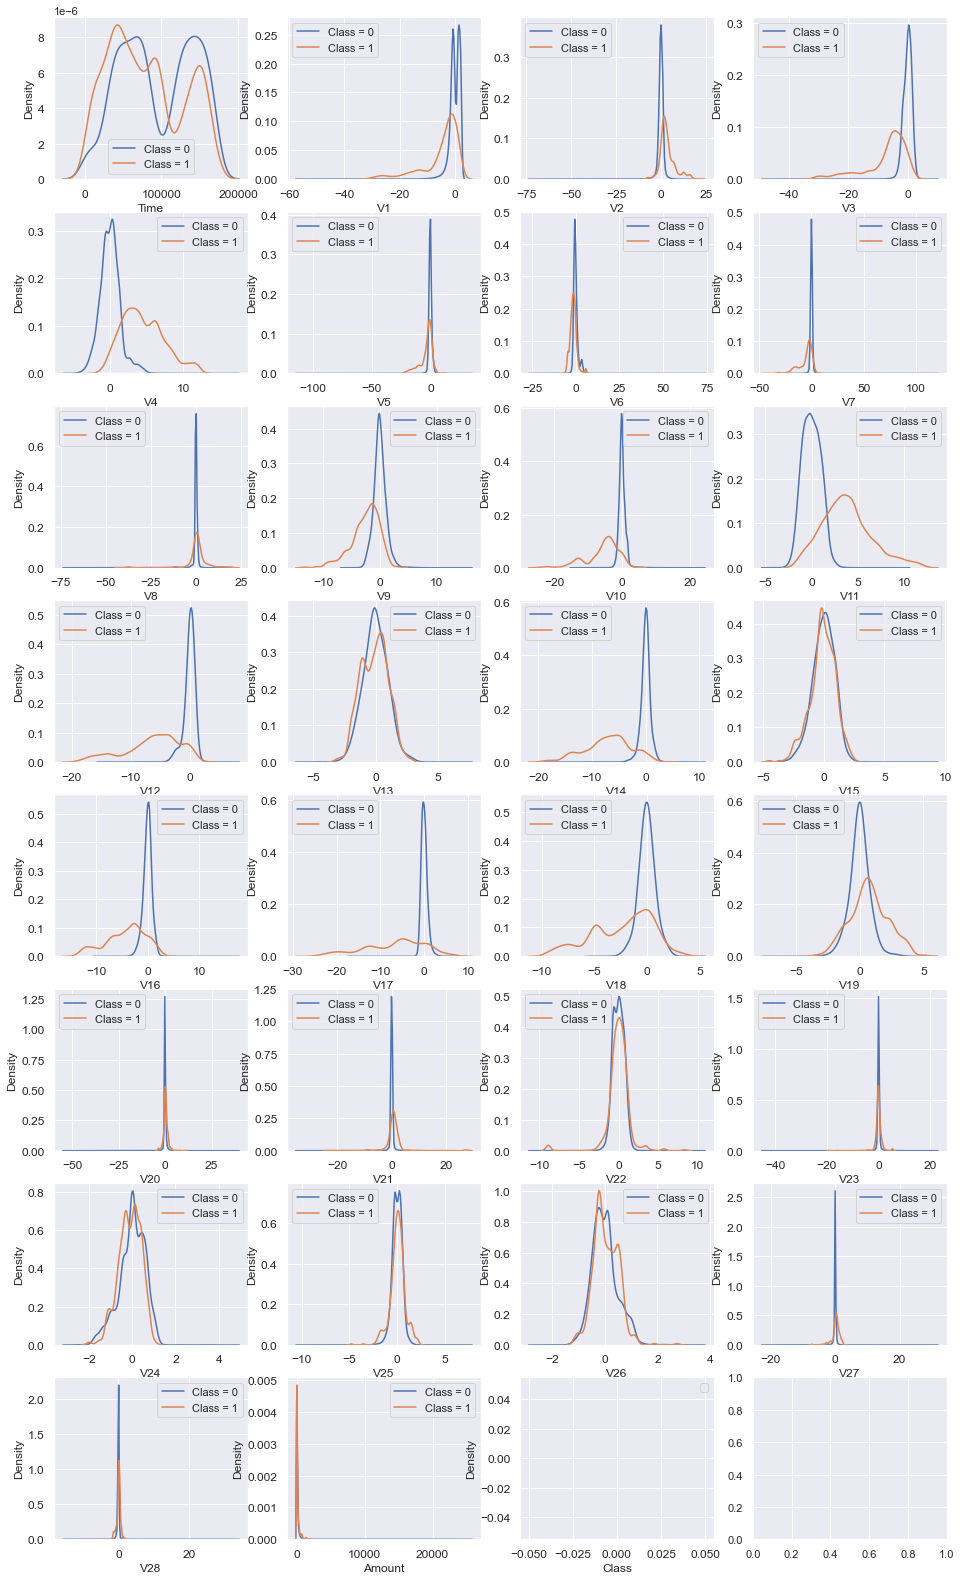

In [14]:
col_values = credit_data.columns.values

i = 0
class_0 = credit_data.loc[credit_data.Class == 0]
class_1 = credit_data.loc[credit_data.Class == 1]

plt.figure()
fig, axes = plt.subplots(8, 4, figsize=(16,28))

for column in col_values:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(class_0[column], bw_method = 0.2, label = 'Class = 0')
    sns.kdeplot(class_1[column], bw_method = 0.2, label = 'Class = 1')
    plt.xlabel(column, fontsize = 12)
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
    plt.legend()
plt.show();


Для безопасных транзакций значения всех атрибутов (помимо Time) сосредоточены около 0, а мошеннические часто имеют смещения. Атрибуты Time, V1, V3, V4, V9, V10, V11, V12, V14, V16, V17, V18, V19 имеют разное распределение значений для мошеннических и безопасных транзакций

Построим матрицу корреляций

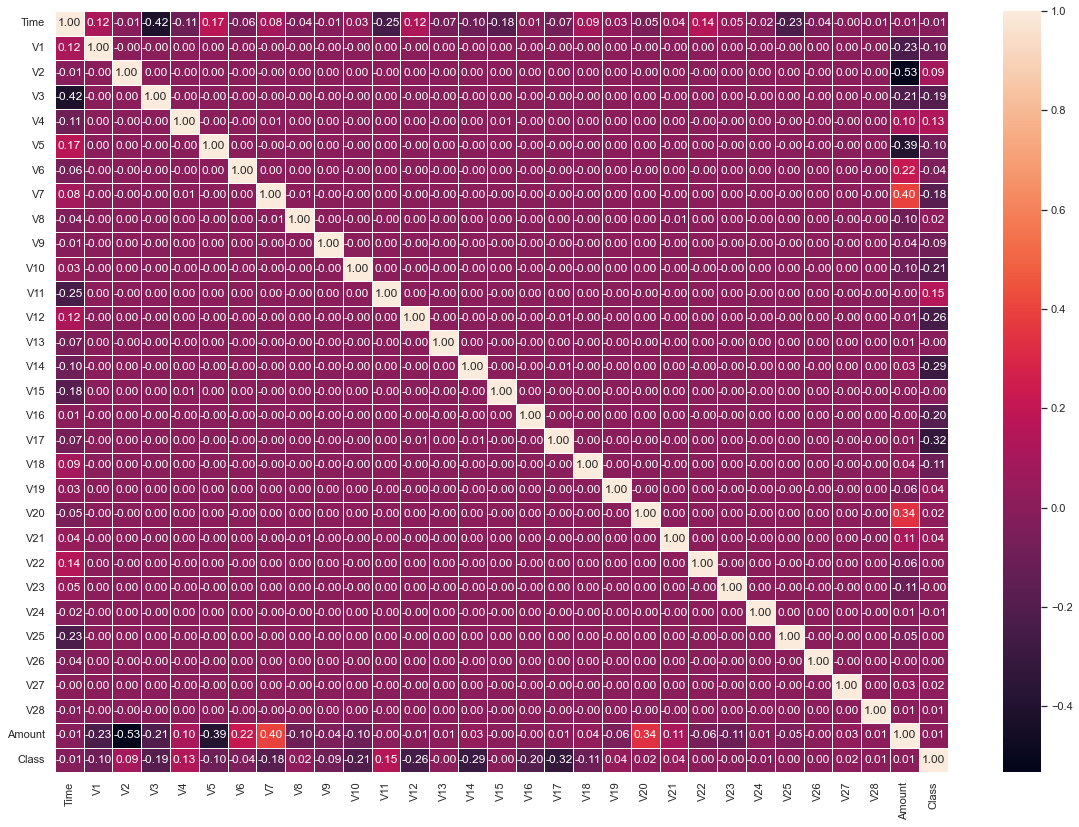

In [15]:
corr = credit_data.corr()
f, ax = plt.subplots(figsize=(20,14))
sns.heatmap(corr, annot = True, fmt = '.2f', linewidths = 0.5);

## Делим исходный набор данных на обучающую и тестовую выборки

Так как набор данных сильно несбалансирован, нужно разделить его на тестовую и обучающие выборки с сохранением пропорций классов, это нужно, чтобы проверять модель на исходной тестовой выборке.

Разделим все безопасные транзакции на тестовую и тренировочную выборку. 

Разделим все мошеннические транзакции на тестовую и тренировочную выборки. 

Соединим эти выборки

In [16]:
class_0 = credit_data.loc[credit_data.Class == 0]

X_0 = class_0.drop('Class', axis=1)
y_0 = class_0['Class']

from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(X_0, y_0, random_state=42,
                                                    # доля объёма тестового множества
                                                    test_size=0.2)

class_1 = credit_data.loc[credit_data.Class == 1]

X_1 = class_1.drop('Class', axis=1)
y_1 = class_1['Class']

X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, random_state=42, test_size=0.2)

X_train_original = pd.concat([X0_train, X1_train])
y_train_original = pd.concat([y0_train, y1_train])
X_test_original = pd.concat([X0_test, X1_test])
y_test_original = pd.concat([y0_test, y1_test])

In [17]:
y_train_original.value_counts()

0    226013
1       372
Name: Class, dtype: int64

In [18]:
print('% мошеннических операций в тренировочной выборке', 372/226013)

% мошеннических операций в тренировочной выборке 0.0016459230221270457


In [19]:
y_test_original.value_counts()

0    56504
1       93
Name: Class, dtype: int64

In [20]:
print('% мошеннических операций в тестовой выборке', 93/56504)

% мошеннических операций в тестовой выборке 0.0016459011751380434


#### UnderSampling 

Создаем сбалансированную обучающую выборку с помощью метода NearMiss

In [21]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss()

X_train_balance, y_train_balance = undersample.fit_resample(X_train_original, y_train_original)

y_train_balance.value_counts()

0    372
1    372
Name: Class, dtype: int64

### Логистическая регрессия

Строим логистическую регрессию со всеми предикторами. Используем statsmodels чтобы увидеть значимость коэффициентов

In [22]:
import statsmodels.api as sm

log_reg = sm.Logit(y_train_balance, X_train_balance).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.073038
         Iterations 23
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  744
Model:                          Logit   Df Residuals:                      714
Method:                           MLE   Df Model:                           29
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.8946
Time:                        15:58:03   Log-Likelihood:                -54.340
converged:                       True   LL-Null:                       -515.70
Covariance Type:            nonrobust   LLR p-value:                1.767e-175
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time       -3.568e-05   1.34e-05     -2.652      0.008    -6.2e-05   -9.31e-06
V1           -11.3186      5

Атрибуты V2, V6, V7, V8, V13, V15, V20, V23, V24, V25, V26, V28 не являются значимыми. Удалим их и построим модель вновь.

In [23]:
column = ['Time', 'V1', 'V3', 'V4', 'V5', 'V9', 'V10', 'V11', 'V12', 'V14',
                    'V16', 'V17', 'V18', 'V19', 'V21', 'V22', 'V27', 'Amount']
X = X_train_balance.loc[:, column]
log_reg = sm.Logit(y_train_balance, X).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.101479
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  744
Model:                          Logit   Df Residuals:                      726
Method:                           MLE   Df Model:                           17
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.8536
Time:                        15:58:09   Log-Likelihood:                -75.500
converged:                       True   LL-Null:                       -515.70
Covariance Type:            nonrobust   LLR p-value:                3.240e-176
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time       -3.956e-05   5.32e-06     -7.434      0.000      -5e-05   -2.91e-05
V1            -0.2960      0

В новой модели коэффициенты V1, V5, V11, V18, V19, V27 оказались не значимы, удалим их и построим модель вновь.

In [24]:
column = ['Time', 'V3', 'V4', 'V9', 'V12', 'V14',
                    'V16', 'V17', 'V21', 'V22', 'Amount']
X = X_train_balance.loc[:, column]
log_reg = sm.Logit(y_train_balance, X).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.106732
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  744
Model:                          Logit   Df Residuals:                      733
Method:                           MLE   Df Model:                           10
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.8460
Time:                        15:58:19   Log-Likelihood:                -79.408
converged:                       True   LL-Null:                       -515.70
Covariance Type:            nonrobust   LLR p-value:                5.048e-181
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time       -4.204e-05   4.41e-06     -9.542      0.000   -5.07e-05   -3.34e-05
V3            -0.8606      0

В модели все коэффициенты значимы, оценим качество модели с помошью classification_report

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver='liblinear')
model.fit(X, y_train_balance)

X_test = X_test_original.loc[:, column]
print("Score обучающая выборка: {:.3f}".format(model.score(X, y_train_balance)))
print("Score тестовая выборка: {:.3f}".format(model.score(X_test, y_test_original)))

Score обучающая выборка: 0.941
Score тестовая выборка: 0.813


In [26]:
# Строим предсказание модели на тестовом множестве

y_pred = model.predict(X_test)
print(metrics.classification_report(y_pred, y_test_original))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     45966
           1       0.80      0.01      0.01     10631

    accuracy                           0.81     56597
   macro avg       0.80      0.50      0.46     56597
weighted avg       0.81      0.81      0.73     56597



In [27]:
#Строим матрицу ошибок

conf_mat = metrics.confusion_matrix(y_test_original, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1
0,45947,10557
1,19,74


Точность модели, использующей обучающую выборку выше на 13%, чем точность модели с тестовыми данными, возможно, это связано с переобучением. Попробуем упростить модель, для этого будем по одному убирать предикторы из модели и оценивать accuracy

In [28]:
# без Time
column = ['V3', 'V4', 'V9', 'V12', 'V14', 'V16', 'V17', 'V21', 'V22', 'Amount']

X = X_train_balance.loc[:, column]
X_test = X_test_original.loc[:, column]

model = LogisticRegression(solver='liblinear')
model.fit(X, y_train_balance)

print("Score обучающая выборка: {:.3f}".format(model.score(X, y_train_balance)))
print("Score тестовая выборка: {:.3f}".format(model.score(X_test, y_test_original)))

Score обучающая выборка: 0.968
Score тестовая выборка: 0.831


In [29]:
# Time убираем, пробуем убрать V3
column = ['V4', 'V9', 'V12', 'V14', 'V16', 'V17', 'V21', 'V22', 'Amount']

X = X_train_balance.loc[:, column]
X_test = X_test_original.loc[:, column]

model = LogisticRegression(solver='liblinear')
model.fit(X, y_train_balance)

print("Score обучающая выборка: {:.3f}".format(model.score(X, y_train_balance)))
print("Score тестовая выборка: {:.3f}".format(model.score(X_test, y_test_original)))

Score обучающая выборка: 0.969
Score тестовая выборка: 0.831


In [30]:
# Time, V3 убираем, пробуем убрать V4
column = ['V9', 'V12', 'V14', 'V16', 'V17', 'V21', 'V22', 'Amount']

X = X_train_balance.loc[:, column]
X_test = X_test_original.loc[:, column]

model = LogisticRegression(solver='liblinear')
model.fit(X, y_train_balance)

print("Score обучающая выборка: {:.3f}".format(model.score(X, y_train_balance)))
print("Score тестовая выборка: {:.3f}".format(model.score(X_test, y_test_original)))

Score обучающая выборка: 0.962
Score тестовая выборка: 0.832


In [31]:
# Time, V3 убираем, пробуем убрать V9
column = ['V4', 'V12', 'V14', 'V16', 'V17', 'V21', 'V22', 'Amount']

X = X_train_balance.loc[:, column]
X_test = X_test_original.loc[:, column]

model = LogisticRegression(solver='liblinear')
model.fit(X, y_train_balance)

print("Score обучающая выборка: {:.3f}".format(model.score(X, y_train_balance)))
print("Score тестовая выборка: {:.3f}".format(model.score(X_test, y_test_original)))

Score обучающая выборка: 0.968
Score тестовая выборка: 0.831


In [32]:
# Time, V3 убираем, пробуем убрать V12
column = ['V4', 'V9', 'V14', 'V16', 'V17', 'V21', 'V22', 'Amount']

X = X_train_balance.loc[:, column]
X_test = X_test_original.loc[:, column]

model = LogisticRegression(solver='liblinear')
model.fit(X, y_train_balance)

print("Score обучающая выборка: {:.3f}".format(model.score(X, y_train_balance)))
print("Score тестовая выборка: {:.3f}".format(model.score(X_test, y_test_original)))

Score обучающая выборка: 0.957
Score тестовая выборка: 0.828


In [33]:
# Time, V3 убираем, пробуем убрать V14
column = ['V4', 'V9', 'V12', 'V16', 'V17', 'V21', 'V22', 'Amount']

X = X_train_balance.loc[:, column]
X_test = X_test_original.loc[:, column]

model = LogisticRegression(solver='liblinear')
model.fit(X, y_train_balance)

print("Score обучающая выборка: {:.3f}".format(model.score(X, y_train_balance)))
print("Score тестовая выборка: {:.3f}".format(model.score(X_test, y_test_original)))

Score обучающая выборка: 0.949
Score тестовая выборка: 0.801


In [34]:
# Time, V3 убираем, пробуем убрать V16
column = ['V4', 'V9', 'V12', 'V14', 'V17', 'V21', 'V22', 'Amount']

X = X_train_balance.loc[:, column]
X_test = X_test_original.loc[:, column]

model = LogisticRegression(solver='liblinear')
model.fit(X, y_train_balance)

print("Score обучающая выборка: {:.3f}".format(model.score(X, y_train_balance)))
print("Score тестовая выборка: {:.3f}".format(model.score(X_test, y_test_original)))

Score обучающая выборка: 0.968
Score тестовая выборка: 0.832


In [35]:
# Time, V3, V16 убираем, пробуем убрать V17
column = ['V4', 'V9', 'V12', 'V14', 'V21', 'V22', 'Amount']

X = X_train_balance.loc[:, column]
X_test = X_test_original.loc[:, column]

model = LogisticRegression(solver='liblinear')
model.fit(X, y_train_balance)

print("Score обучающая выборка: {:.3f}".format(model.score(X, y_train_balance)))
print("Score тестовая выборка: {:.3f}".format(model.score(X_test, y_test_original)))

Score обучающая выборка: 0.968
Score тестовая выборка: 0.832


In [36]:
# Time, V3, V16, V17 убираем, пробуем убрать V21
column = ['V4', 'V9', 'V12', 'V14', 'V22', 'Amount']

X = X_train_balance.loc[:, column]
X_test = X_test_original.loc[:, column]

model = LogisticRegression(solver='liblinear')
model.fit(X, y_train_balance)

print("Score обучающая выборка: {:.3f}".format(model.score(X, y_train_balance)))
print("Score тестовая выборка: {:.3f}".format(model.score(X_test, y_test_original)))

Score обучающая выборка: 0.964
Score тестовая выборка: 0.832


In [37]:
# Time, V3, V16, V17, V21 убираем, пробуем убрать V22
column = ['V4', 'V9', 'V12', 'V14', 'Amount']

X = X_train_balance.loc[:, column]
X_test = X_test_original.loc[:, column]

model = LogisticRegression(solver='liblinear')
model.fit(X, y_train_balance)

print("Score обучающая выборка: {:.3f}".format(model.score(X, y_train_balance)))
print("Score тестовая выборка: {:.3f}".format(model.score(X_test, y_test_original)))

Score обучающая выборка: 0.966
Score тестовая выборка: 0.831


In [38]:
# Time, V3, V16, V17, V21, V22 убираем, пробуем убрать Amount
column = ['V4', 'V9', 'V12', 'V14', 'V22']

X = X_train_balance.loc[:, column]
X_test = X_test_original.loc[:, column]

model = LogisticRegression(solver='liblinear')
model.fit(X, y_train_balance)

print("Score обучающая выборка: {:.3f}".format(model.score(X, y_train_balance)))
print("Score тестовая выборка: {:.3f}".format(model.score(X_test, y_test_original)))

Score обучающая выборка: 0.934
Score тестовая выборка: 0.966


Остановимся на этой модели, так как она дает максимальную точность на тестовых данных. Построим classification_report и матрицу ошибок

In [39]:
y_pred = model.predict(X_test)
print(metrics.classification_report(y_pred, y_test_original))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     54614
           1       0.88      0.04      0.08      1983

    accuracy                           0.97     56597
   macro avg       0.92      0.52      0.53     56597
weighted avg       0.96      0.97      0.95     56597



In [40]:
conf_mat = metrics.confusion_matrix(y_test_original, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1
0,54603,1901
1,11,82


Не смотря на то, что удалось улучшить модель, все равно точность предсказаний слаба, Recall всего 0.08. Попробуем построить модель, используя другие методы

## Случайный лес


In [41]:
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier(random_state=42,
                               #зерно случайных чисел
                               # опции, относящиеся к отдельным деревьям такие же, как в tree.DecisionTreeClassifier
                               # число деревьев в лесу
                               n_estimators=30,
                               # функция для impurity ('gini' или 'entropy') - как измеряем чистоту узла
                               criterion='gini',
                               # максимальное число слоев дерева
                               max_depth=5,
                               # Вычислять out-of-bag ошибку
                               oob_score=True,
                               # использовать результаты предыдущего вызова и нарастить предыдущий лес 
                               warm_start=False,
                               # веса классов для балансировки обучения, для решения несбалансированности классов 
                               class_weight=None
                                )

Построим модель классификации, используя алгоритм случайного леса. Используем сбалансированные выборки

In [42]:
model_1.fit(X_train_balance, y_train_balance)

y_pred_1 = model_1.predict(X_test_original)
print(metrics.classification_report(y_pred_1, y_test_original))



              precision    recall  f1-score   support

           0       0.91      1.00      0.95     51627
           1       0.86      0.02      0.03      4970

    accuracy                           0.91     56597
   macro avg       0.89      0.51      0.49     56597
weighted avg       0.91      0.91      0.87     56597



In [43]:
cm = pd.crosstab(y_test_original.values, y_pred_1, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,51614,4890
1,13,80


Матрица ошибок показывает, что много ложных срабатываний. Recall мошеннических операций всего 0.02

Построим модель 2, используем исходные несбалансированные классы

In [44]:
model_1.fit(X_train_original, y_train_original)

y_pred_2 = model_1.predict(X_test_original)
print(metrics.classification_report(y_pred_2, y_test_original))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56531
           1       0.63      0.89      0.74        66

    accuracy                           1.00     56597
   macro avg       0.82      0.95      0.87     56597
weighted avg       1.00      1.00      1.00     56597



In [45]:
cm = pd.crosstab(y_test_original.values, y_pred_2, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,56497,7
1,34,59


Число ложных срабатываний уменьшилось кратно, Precision снизился, но Recall увеличился в 40 раз

Построим модель 3, в которой сбалансируем классы, используя встроенный метод class_weight

In [46]:
model_3 = RandomForestClassifier(random_state=42,
                               n_estimators=30,
                               criterion='gini',
                               max_depth=5,
                               oob_score=True,
                               warm_start=False,
                               class_weight='balanced'
                               )

In [47]:
model_3.fit(X_train_original, y_train_original)

y_pred_3 = model_3.predict(X_test_original)
print(metrics.classification_report(y_pred_3, y_test_original))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56305
           1       0.84      0.27      0.41       292

    accuracy                           1.00     56597
   macro avg       0.92      0.63      0.70     56597
weighted avg       1.00      1.00      0.99     56597



In [48]:
cm = pd.crosstab(y_test_original.values, y_pred_3, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,56290,214
1,15,78


В модели 3 Precision увеличился до 0.84 снизился, а Recall снизился до 0.27. По сравнению с моделью 2, увеличилось число ложных срабатываний (214), но снизилось количество пропущенных мошеннических операций (15).

С какой моделью работать дальше, с моделью 2 или 3 зависит от требований банка. В каком случае он понесет меньшие потери: при большем количестве срабатываний или при большей точности этих срабатываний? Для этого должны быть заданы референтные параметры Precision и Recall.

Медиана суммы мошеннической транзакции = 17 долларов, поэтому я считаю что банку будет выгоднее использовать модель с большей полнотой Recall (модель 2). 

Попробуем увеличить число деревьев n_estimators до 100.


In [49]:
model_4 = RandomForestClassifier(random_state=42,
                               n_estimators=100,
                               criterion='gini',
                               max_depth=5,
                               oob_score=True,
                               warm_start=False,
                               class_weight=None
                                )

model_4.fit(X_train_original, y_train_original)

y_pred_4 = model_4.predict(X_test_original)
print(metrics.classification_report(y_pred_4, y_test_original))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56533
           1       0.61      0.89      0.73        64

    accuracy                           1.00     56597
   macro avg       0.81      0.94      0.86     56597
weighted avg       1.00      1.00      1.00     56597



In [50]:
cm = pd.crosstab(y_test_original.values, y_pred_4, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,56497,7
1,36,57


Precision ухудшился до 0.61. Оставим 30 деревьев и попробуем уменьшить максимальную глубину слоев дерева max_depth до 3

In [51]:
model_5 = RandomForestClassifier(random_state=42,
                               n_estimators=30,
                               criterion='gini',
                               max_depth=3,
                               oob_score=True,
                               warm_start=False,
                               class_weight=None
                               )

model_5.fit(X_train_original, y_train_original)

y_pred_5 = model_5.predict(X_test_original)

cm = pd.crosstab(y_test_original.values, y_pred_5, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,56491,13
1,39,54


In [52]:
print(metrics.classification_report(y_pred_5, y_test_original))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56530
           1       0.58      0.81      0.68        67

    accuracy                           1.00     56597
   macro avg       0.79      0.90      0.84     56597
weighted avg       1.00      1.00      1.00     56597



И Precision и Recall ухудшились. Попробуем увеличить максимальную глубину слоев дерева max_depth до 7

In [53]:
model_6 = RandomForestClassifier(random_state=42,
                               n_estimators=30,
                               criterion='gini',
                               max_depth=7,
                               oob_score=True,
                               warm_start=False,
                               class_weight=None
                                )

model_6.fit(X_train_original, y_train_original)

y_pred_6 = model_6.predict(X_test_original)

cm = pd.crosstab(y_test_original.values, y_pred_6, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,56497,7
1,30,63


In [54]:
print(metrics.classification_report(y_pred_6, y_test_original))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56527
           1       0.68      0.90      0.77        70

    accuracy                           1.00     56597
   macro avg       0.84      0.95      0.89     56597
weighted avg       1.00      1.00      1.00     56597



И Precision и Recall увеличились. Попробуем еще увеличить максимальную глубину слоев дерева max_depth до 13

In [55]:
model_7 = RandomForestClassifier(random_state=42,
                               n_estimators=30,
                               criterion='gini',
                               max_depth=13,
                               oob_score=True,
                               warm_start=False,
                               class_weight=None
                               )

model_7.fit(X_train_original, y_train_original)

y_pred_7 = model_7.predict(X_test_original)

cm_7 = pd.crosstab(y_test_original.values, y_pred_7, rownames=['Actual'], colnames=['Predicted'])
cm_7

Predicted,0,1
Actual,,
0,56501,3
1,26,67


In [56]:
print(metrics.classification_report(y_pred_7, y_test_original))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56527
           1       0.72      0.96      0.82        70

    accuracy                           1.00     56597
   macro avg       0.86      0.98      0.91     56597
weighted avg       1.00      1.00      1.00     56597



И Precision и Recall увеличились. Попробуем еще увеличить максимальную глубину слоев дерева max_depth до 15

In [57]:
model_8 = RandomForestClassifier(random_state=42,
                               n_estimators=30,
                               criterion='gini',
                               max_depth=15,
                               oob_score=True,
                               warm_start=False,
                               class_weight=None
                               )

model_8.fit(X_train_original, y_train_original)

y_pred_8 = model_8.predict(X_test_original)

cm = pd.crosstab(y_test_original.values, y_pred_8, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,56501,3
1,26,67


И Precision и Recall  остались прежними, попробуем уменьшить max_depth до 12

In [58]:
model_9 = RandomForestClassifier(random_state=42,
                               n_estimators=30,
                               criterion='gini',
                               max_depth=12,
                               oob_score=True,
                               warm_start=False,
                               class_weight=None
                               )

model_9.fit(X_train_original, y_train_original)

y_pred_9 = model_9.predict(X_test_original)

cm = pd.crosstab(y_test_original.values, y_pred_9, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,56500,4
1,28,65


In [59]:
print(metrics.classification_report(y_pred_9, y_test_original))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56528
           1       0.70      0.94      0.80        69

    accuracy                           1.00     56597
   macro avg       0.85      0.97      0.90     56597
weighted avg       1.00      1.00      1.00     56597



Модель ухудшилась, оставим модель 7 (n_estimators=30, max_depth=13) Посмотрим на информативность предикторов

In [60]:
pd.DataFrame({'feature': X_train_original.columns,
              'importance': model_7.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
17,V17,0.192985
14,V14,0.174732
12,V12,0.107167
10,V10,0.076838
16,V16,0.070396
7,V7,0.036345
9,V9,0.035852
11,V11,0.029440
3,V3,0.026890
4,V4,0.026549


Удалим из модели 7 столбцы, информативность которых меньше 0.02

In [61]:
column = ['V17', 'V14', 'V12', 'V10', 'V16', 'V7', 'V9', 'V11', 'V3', 'V4', 'V21']

X = X_train_original.loc[:, column]
X_test = X_test_original.loc[:, column]

model_7.fit(X, y_train_original)

y_pred = model_7.predict(X_test)

cm = pd.crosstab(y_test_original.values, y_pred, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,56498,6
1,24,69


In [62]:
print(metrics.classification_report(y_pred, y_test_original))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56522
           1       0.74      0.92      0.82        75

    accuracy                           1.00     56597
   macro avg       0.87      0.96      0.91     56597
weighted avg       1.00      1.00      1.00     56597



Precision повысился с 0.72 до 0.74, Recall понизился с 0.96 до 0.92, увеличилось число ложных срабатываний, т.е. модель стала хуже. Добавим столбцы с информативностью выше 0.01

In [63]:
column = ['V17', 'V14', 'V12', 'V10', 'V16', 'V7', 'V9', 'V11', 'V3', 'V4', 'V21',
         'V20', 'V5', 'V18', 'V26', 'V2', 'Amount', 'V6', 'V8', 'V1']

X = X_train_original.loc[:, column]
X_test = X_test_original.loc[:, column]

model_7.fit(X, y_train_original)

y_pred = model_7.predict(X_test)

cm = pd.crosstab(y_test_original.values, y_pred, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,56500,4
1,26,67


In [64]:
print(metrics.classification_report(y_pred, y_test_original))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56526
           1       0.72      0.94      0.82        71

    accuracy                           1.00     56597
   macro avg       0.86      0.97      0.91     56597
weighted avg       1.00      1.00      1.00     56597



Precision возвратился к значению 0.72, Recall 0.94, число ложных срабатываний 4, т.е. по сравнению с предыдущим вариантом, модель стала лучше. Вернем еще 3 столбца

In [65]:
column = ['V17', 'V14', 'V12', 'V10', 'V16', 'V7', 'V9', 'V11', 'V3', 'V4', 'V21',
         'V20', 'V5', 'V18', 'V26', 'V2', 'Amount', 'V6', 'V8', 'V1',
         'V15', 'V22', 'Time']

X = X_train_original.loc[:, column]
X_test = X_test_original.loc[:, column]

model_7.fit(X, y_train_original)

y_pred = model_7.predict(X_test)

cm = pd.crosstab(y_test_original.values, y_pred, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,56501,3
1,24,69


In [66]:
print(metrics.classification_report(y_pred, y_test_original))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56525
           1       0.74      0.96      0.84        72

    accuracy                           1.00     56597
   macro avg       0.87      0.98      0.92     56597
weighted avg       1.00      1.00      1.00     56597



По сравнению с моделью 7, precision увеличился с 0.72 до 0.74, recall остался прежним, f1-score увеличился с 0.82 до 0.84. Попробуем добавить следующий по информативности атрибут

In [68]:
column = ['V17', 'V14', 'V12', 'V10', 'V16', 'V7', 'V9', 'V11', 'V3', 'V4', 'V21',
         'V20', 'V5', 'V18', 'V26', 'V2', 'Amount', 'V6', 'V8', 'V1',
         'V15', 'V22', 'Time', 'V19']

X = X_train_original.loc[:, column]
X_test = X_test_original.loc[:, column]

model_7.fit(X, y_train_original)

y_pred = model_7.predict(X_test)

cm = pd.crosstab(y_test_original.values, y_pred, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,56501,3
1,25,68


По сравнению с предыдущей моделью, показатели ухудшились. Попробуем удалить Time и V19

In [69]:
column = ['V17', 'V14', 'V12', 'V10', 'V16', 'V7', 'V9', 'V11', 'V3', 'V4', 'V21',
         'V20', 'V5', 'V18', 'V26', 'V2', 'Amount', 'V6', 'V8', 'V1',
         'V15', 'V22']

X = X_train_original.loc[:, column]
X_test = X_test_original.loc[:, column]

model_7.fit(X, y_train_original)

y_pred = model_7.predict(X_test)

cm = pd.crosstab(y_test_original.values, y_pred, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,56499,5
1,26,67


Модель вновь ухудшилась, следовательно, можно остановиться на следующих параметрах:

**n_estimators=30, max_depth=13**

**column = ['V17', 'V14', 'V12', 'V10', 'V16', 'V7', 'V9', 'V11', 'V3', 'V4', 'V21',
         'V20', 'V5', 'V18', 'V26', 'V2', 'Amount', 'V6', 'V8', 'V1',
         'V15', 'V22', 'Time']**
         
Построим вновь итоговую модель:

In [70]:
model_7 = RandomForestClassifier(random_state=42,
                               n_estimators=30,
                               criterion='gini',
                               max_depth=13,
                               oob_score=True,
                               warm_start=False,
                               class_weight=None
                               )

column = ['V17', 'V14', 'V12', 'V10', 'V16', 'V7', 'V9', 'V11', 'V3', 'V4', 'V21',
         'V20', 'V5', 'V18', 'V26', 'V2', 'Amount', 'V6', 'V8', 'V1',
         'V15', 'V22', 'Time']

X = X_train_original.loc[:, column]
X_test = X_test_original.loc[:, column]

model_7.fit(X, y_train_original)

y_pred = model_7.predict(X_test)

cm = pd.crosstab(y_test_original.values, y_pred, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,56501,3
1,24,69


In [71]:
print(metrics.classification_report(y_pred, y_test_original))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56525
           1       0.74      0.96      0.84        72

    accuracy                           1.00     56597
   macro avg       0.87      0.98      0.92     56597
weighted avg       1.00      1.00      1.00     56597

